In [5]:
# Data preparation
! mkdir data
! mkdir data/github_dataset
! mkdir data/movielens_10M

mkdir: data: File exists
mkdir: data/github_dataset: File exists
mkdir: data/movielens_10M: File exists


## 0 数据读取
### 0.1 读取Alzheimer Disease and Healthy Aging Data in US数据集
* 读入数据
* 区分标称(nominal)属性和数值(numerical)属性

In [2]:
import pandas as pd

# Read data
alzheimer_data = pd.read_csv('./data/Alzheimer Disease and Healthy Aging Data In US.csv', low_memory=False)

# Replace false item
alzheimer_data = alzheimer_data.replace('.', None)
alzheimer_data = alzheimer_data.astype({"Low_Confidence_Limit": float, "High_Confidence_Limit": float})

# Split nominal and numerical columns
alzheimer_nominal = alzheimer_data.select_dtypes([object])
print(f"==========Nominal Items==========")
print(alzheimer_nominal.dtypes)

alzheimer_numerical = alzheimer_data.select_dtypes([int, float])
print(f"=========Numerical Items=========")
print(alzheimer_numerical.dtypes)

==========Nominal Items==========
LocationAbbr                 object
LocationDesc                 object
Datasource                   object
Class                        object
Topic                        object
Question                     object
Data_Value_Unit              object
DataValueTypeID              object
Data_Value_Type              object
StratificationCategory1      object
Stratification1              object
StratificationCategory2      object
Stratification2              object
Geolocation                  object
ClassID                      object
TopicID                      object
QuestionID                   object
StratificationCategoryID1    object
StratificationID1            object
StratificationCategoryID2    object
StratificationID2            object
dtype: object
=========Numerical Items=========
YearStart                  int64
YearEnd                    int64
Data_Value               float64
Data_Value_Alt           float64
Low_Confidence_Limit     float

### 0.2 读取GitHub Dataset
* 读入数据
* 区分标称(nominal)属性和数值(numerical)属性

In [10]:
# Read data
github_data = pd.read_csv('./data/github_dataset/repository_data.csv', low_memory=False)

# Split nominal and numerical columns
github_nominal = github_data.select_dtypes([object])
print(f"==========Nominal Items==========")
print(github_nominal.dtypes)

github_numerical = github_data.select_dtypes([int, float])
print(f"=========Numerical Items=========")
print(github_numerical.dtypes)

==========Nominal Items==========
name                object
primary_language    object
languages_used      object
created_at          object
licence             object
dtype: object
=========Numerical Items=========
stars_count        int64
forks_count        int64
watchers           int64
pull_requests      int64
commit_count     float64
dtype: object


## 1 数据摘要和可视化
### 1.1 数据摘要
#### 1.1.1 标称属性
* 所有可能取值的频数统计
* 修改注释以修改操作的数据集

In [3]:
def nominal_summary(nominal_dataframe: pd.DataFrame):
    for column in nominal_dataframe:
        print(nominal_dataframe[column].value_counts())
        
nominal_summary(alzheimer_nominal)
# nominal_summary(github_nominal)

LocationAbbr
US      4644
WEST    4638
NRE     4614
MDW     4611
OR      4565
NY      4557
SOU     4542
UT      4222
OH      3955
GA      3951
MD      3919
HI      3907
TN      3879
MI      3796
VA      3758
FL      3753
ME      3733
TX      3699
NV      3696
DC      3684
WV      3682
MS      3677
PA      3648
NM      3635
AL      3633
KY      3623
AK      3611
SC      3592
NJ      3589
AZ      3582
MO      3573
IL      3571
IN      3570
WI      3569
LA      3563
MN      3555
NE      3546
CT      3543
RI      3534
OK      3526
SD      3526
ND      3514
KS      3510
ID      3507
IA      3501
AR      3498
WY      3494
CA      3447
CO      3390
NC      3349
WA      3348
MT      3348
DE      3346
NH      3284
VT      3278
MA      3174
PR      2797
GU      2703
VI       503
Name: count, dtype: int64
LocationDesc
United States, DC & Territories    4644
West                               4638
Northeast                          4614
Midwest                            4611
Oregon               

#### 1.1.2 数值属性
* 五数概括和缺失值统计
* 修改注释以修改操作的数据集

In [4]:
import numpy as np

def five_number_summary(array):
    print(f"最小值：{np.min(array)}")
    print(f"第一四分位数: {np.quantile(array, 0.25)}")
    print(f"中位数: {np.median(array)}")
    print(f"第二四分位数: {np.quantile(array, 0.75)}")
    print(f"最大值：{np.max(array)}")
    

def numerical_summary(numerical_dataframe: pd.DataFrame):
    for column in numerical_dataframe:
        print(f"=========={column}==========")
        if not all(numerical_dataframe[column].isna()):
            data = numerical_dataframe[column].dropna().tolist()
            five_number_summary(data)
        else:
            print(f"该项数据均为缺失值")
        print(f"缺失值个数：{numerical_dataframe[column].isna().sum(axis=0)}")
        
numerical_summary(alzheimer_numerical)
# numerical_summary(github_numerical)

==========YearStart==========
最小值：2015
第一四分位数: 2016.0
中位数: 2017.0
第二四分位数: 2019.0
最大值：2020
缺失值个数：0
==========YearEnd==========
最小值：2015
第一四分位数: 2016.0
中位数: 2018.0
第二四分位数: 2019.0
最大值：2020
缺失值个数：0
==========Data_Value==========
最小值：0.0
第一四分位数: 15.3
中位数: 32.5
第二四分位数: 56.8
最大值：100.0
缺失值个数：69833
==========Data_Value_Alt==========
最小值：0.0
第一四分位数: 15.3
中位数: 32.5
第二四分位数: 56.8
最大值：100.0
缺失值个数：69833
==========Low_Confidence_Limit==========
最小值：0.0
第一四分位数: 12.0
中位数: 26.9
第二四分位数: 49.1
最大值：99.6
缺失值个数：70009
==========High_Confidence_Limit==========
最小值：1.4
第一四分位数: 19.0
中位数: 38.5
第二四分位数: 64.7
最大值：100.0
缺失值个数：70009
==========Sample_Size==========
该项数据均为缺失值
缺失值个数：214462
==========LocationID==========
最小值：1
第一四分位数: 18.0
中位数: 33.0
第二四分位数: 49.0
最大值：9004
缺失值个数：0


### 1.2 数据可视化
* 绘制直方图和盒图
* 修改注释以修改操作的数据集

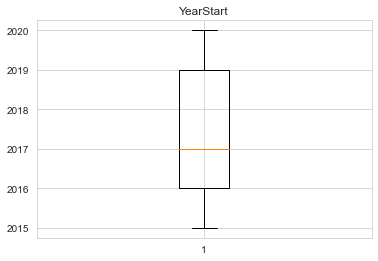

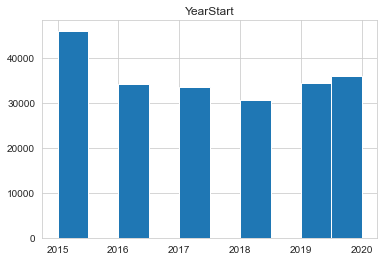

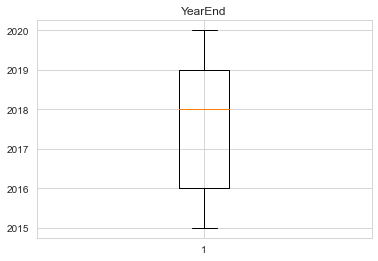

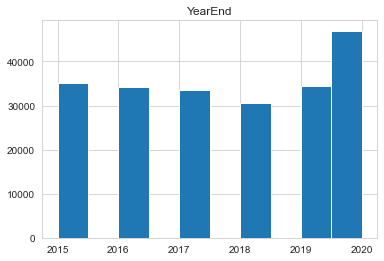

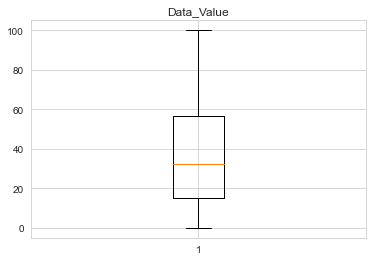

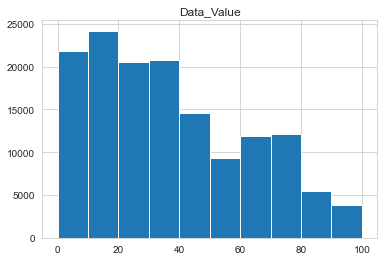

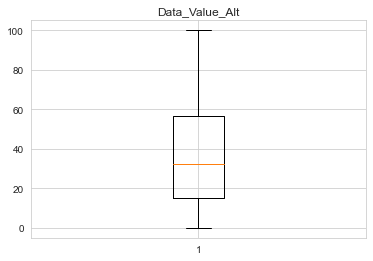

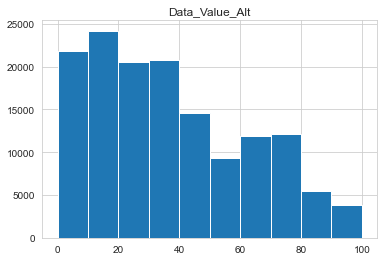

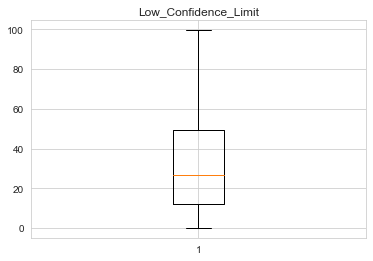

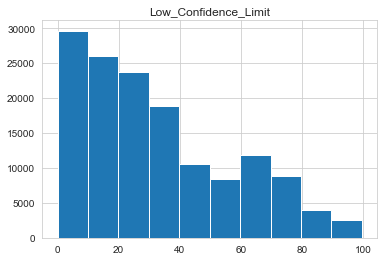

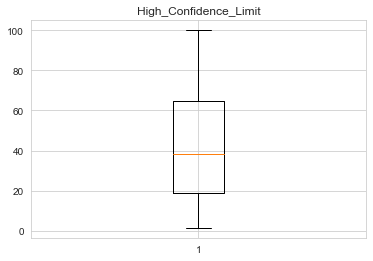

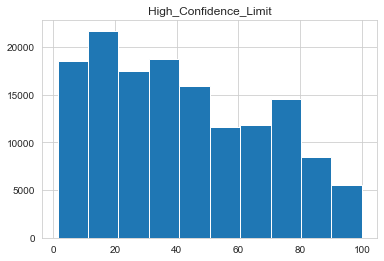

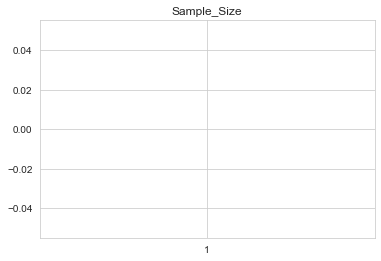

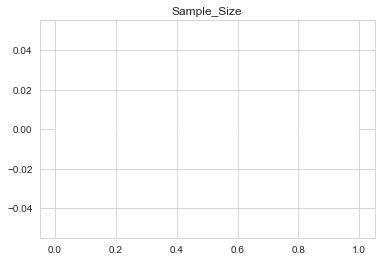

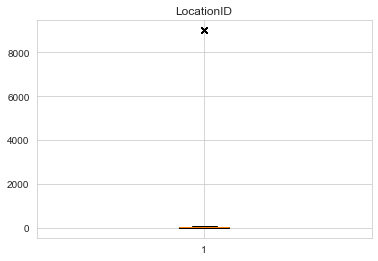

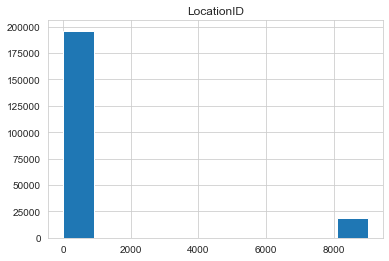

In [18]:
import matplotlib.pyplot as plt


def boxplot(a: list, title: str = None):
    plt.figure()
    plt.boxplot(a,sym='x',vert=True)
    
    if isinstance(title, str):
        plt.title(title)

    plt.show()
    
    
def hist(a: list, title: str = None):
    plt.figure()
    plt.hist(a)
    
    if isinstance(title, str):
        plt.title(title)

    plt.show()
    

def visualize(dataframe: pd.DataFrame, column_name: str = None):
    if isinstance(dataframe, pd.DataFrame):
        for column in dataframe:
            boxplot(dataframe[column].dropna().tolist(), column)
            hist(dataframe[column].dropna().tolist(), column)
    elif isinstance(dataframe, pd.Series):
        boxplot(dataframe.tolist(), column_name)
        hist(dataframe.tolist(), column_name)
visualize(alzheimer_numerical)
# visualize(github_numerical)

## 2 数据缺失的处理

### 2.0 标称属性数值化

In [6]:
def numerize(numerical_dataframe: pd.DataFrame, nominal_dataframe: pd.DataFrame):
    new_dataframe = pd.DataFrame()
    for column in numerical_dataframe:
        new_dataframe[column] = numerical_dataframe[column]

    for column in nominal_dataframe:
        mapping = nominal_dataframe[column].value_counts().to_dict()
        for i, (key, _) in enumerate(mapping.items()):
            mapping[key] = i
        new_dataframe[column] = nominal_dataframe[column].map(mapping)
    
    return new_dataframe

alzheimer_data_numerized = numerize(alzheimer_numerical, alzheimer_nominal)
print(alzheimer_data_numerized)

# github_data_numerized = numerize(github_numerical, github_nominal)
# print(github_data_numerized)

        YearStart  YearEnd  Data_Value  Data_Value_Alt  Low_Confidence_Limit  \
0            2020     2020        26.3            26.3                  23.9   
1            2017     2017        24.0            24.0                  21.2   
2            2017     2017        35.7            35.7                  32.5   
3            2018     2018         4.8             4.8                   4.0   
4            2020     2020        13.7            13.7                  12.1   
...           ...      ...         ...             ...                   ...   
214457       2016     2016         NaN             NaN                   NaN   
214458       2015     2015         NaN             NaN                   NaN   
214459       2017     2017         NaN             NaN                   NaN   
214460       2016     2016        10.6            10.6                   8.6   
214461       2018     2018         NaN             NaN                   NaN   

        High_Confidence_Limit  Sample_S

### 2.1 将缺失部分剔除

In [5]:
def numerical_dropna(dataframe: pd.DataFrame):
    for column in dataframe:
        if all(dataframe[column].notna()):
            print(f"数据项{column}无缺失值")
        elif not all(dataframe[column].isna()):
            print(f"数据项{column}部分值缺失，剔除缺失值后的结果与1.1.2节一致")
        else:
            print(f"数据项{column}全为缺失值")
            
numerical_dropna(alzheimer_numerical)
# numerical_dropna(github_numerical)

数据项YearStart无缺失值
数据项YearEnd无缺失值
数据项Data_Value部分值缺失，剔除缺失值后的结果与1.1.2节一致
数据项Data_Value_Alt部分值缺失，剔除缺失值后的结果与1.1.2节一致
数据项Low_Confidence_Limit部分值缺失，剔除缺失值后的结果与1.1.2节一致
数据项High_Confidence_Limit部分值缺失，剔除缺失值后的结果与1.1.2节一致
数据项Sample_Size全为缺失值
数据项LocationID无缺失值


### 2.2 用最高频率值来填补缺失值

数据项YearStart无缺失值
数据项YearEnd无缺失值
数据项Data_Value部分值缺失，用最高频率值来填补缺失值前的结果为：
最小值：0.0
第一四分位数: nan
中位数: nan
第二四分位数: nan
最大值：100.0


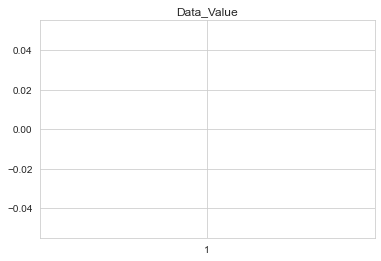

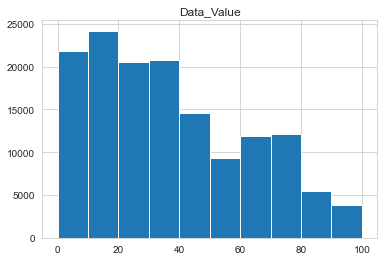

用最高频率值来填补缺失值后的结果为：
最小值：0.0
第一四分位数: 6.0
中位数: 15.9
第二四分位数: 42.1
最大值：100.0


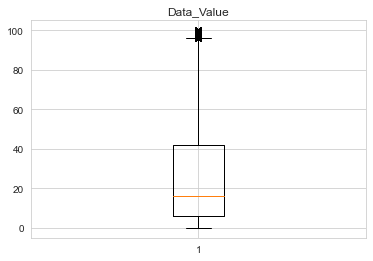

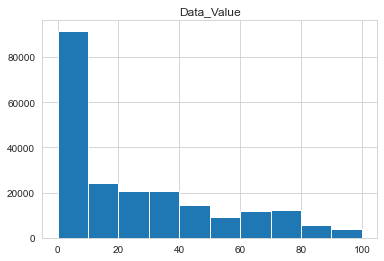

数据项Data_Value_Alt部分值缺失，用最高频率值来填补缺失值前的结果为：
最小值：0.0
第一四分位数: nan
中位数: nan
第二四分位数: nan
最大值：100.0


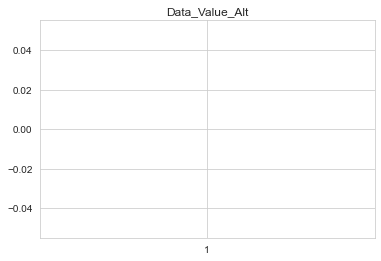

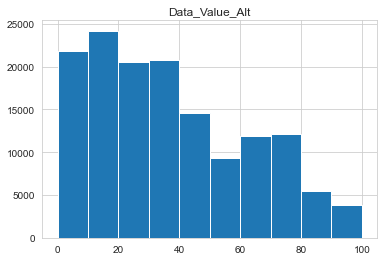

用最高频率值来填补缺失值后的结果为：
最小值：0.0
第一四分位数: 6.0
中位数: 15.9
第二四分位数: 42.1
最大值：100.0


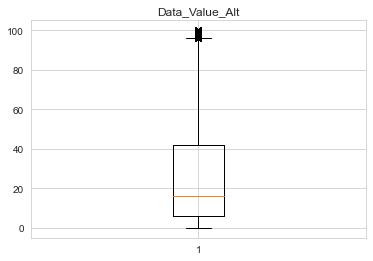

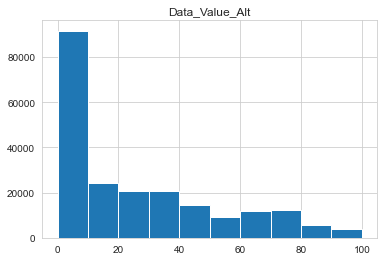

数据项Low_Confidence_Limit部分值缺失，用最高频率值来填补缺失值前的结果为：
最小值：0.0
第一四分位数: nan
中位数: nan
第二四分位数: nan
最大值：99.6


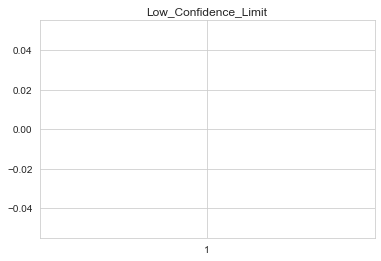

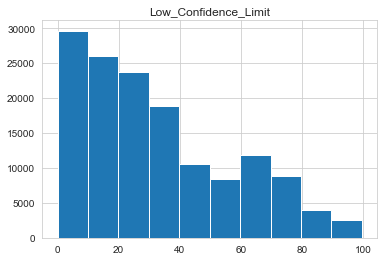

用最高频率值来填补缺失值后的结果为：
最小值：0.0
第一四分位数: 4.8
中位数: 12.5
第二四分位数: 35.3
最大值：99.6


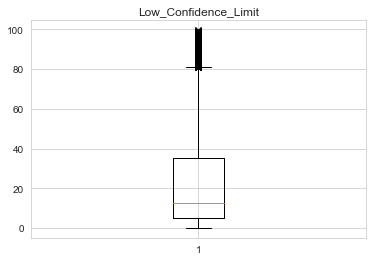

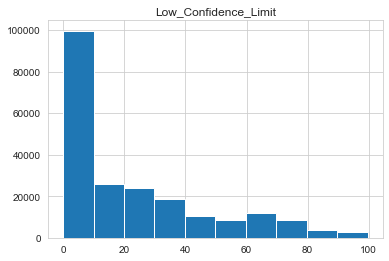

数据项High_Confidence_Limit部分值缺失，用最高频率值来填补缺失值前的结果为：
最小值：1.4
第一四分位数: nan
中位数: nan
第二四分位数: nan
最大值：100.0


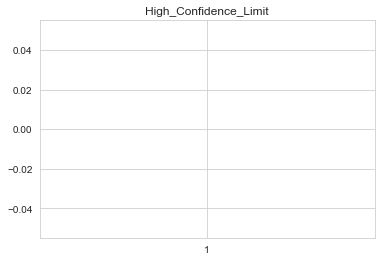

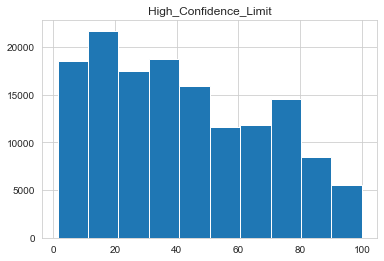

用最高频率值来填补缺失值后的结果为：
最小值：1.4
第一四分位数: 6.5
中位数: 19.6
第二四分位数: 49.6
最大值：100.0


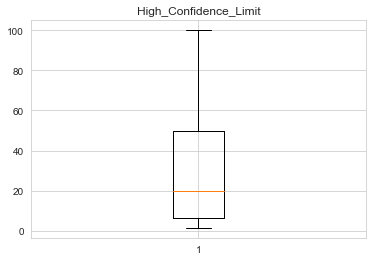

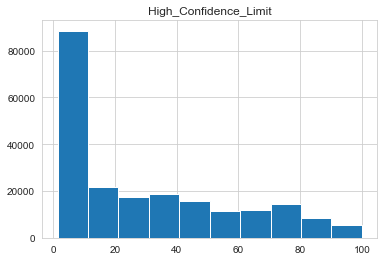

数据项Sample_Size全为缺失值
数据项LocationID无缺失值


In [19]:
def numerical_fillmode(dataframe: pd.DataFrame):
    for column in dataframe:
        if all(dataframe[column].notna()):
            print(f"数据项{column}无缺失值")
        elif not all(dataframe[column].isna()):
            print(f"数据项{column}部分值缺失，用最高频率值来填补缺失值前的结果为：")
            data = dataframe[column]
            five_number_summary(data)
            visualize(data, column)
            print(f"用最高频率值来填补缺失值后的结果为：")
            data = data.fillna(value=data.mode().tolist()[0])
            five_number_summary(data)
            visualize(data, column)
        else:
            print(f"数据项{column}全为缺失值")
        print("=" * 50)
        
numerical_fillmode(alzheimer_numerical)
# numerical_fillmode(github_numerical)

### 2.3 通过属性的相关关系来填补缺失值
* 根据数值化后的所有属性数据计算属性之间的相关性系数
* 选取相关性最高的数据项对缺失数据进行填充，填充方法与2.2相似

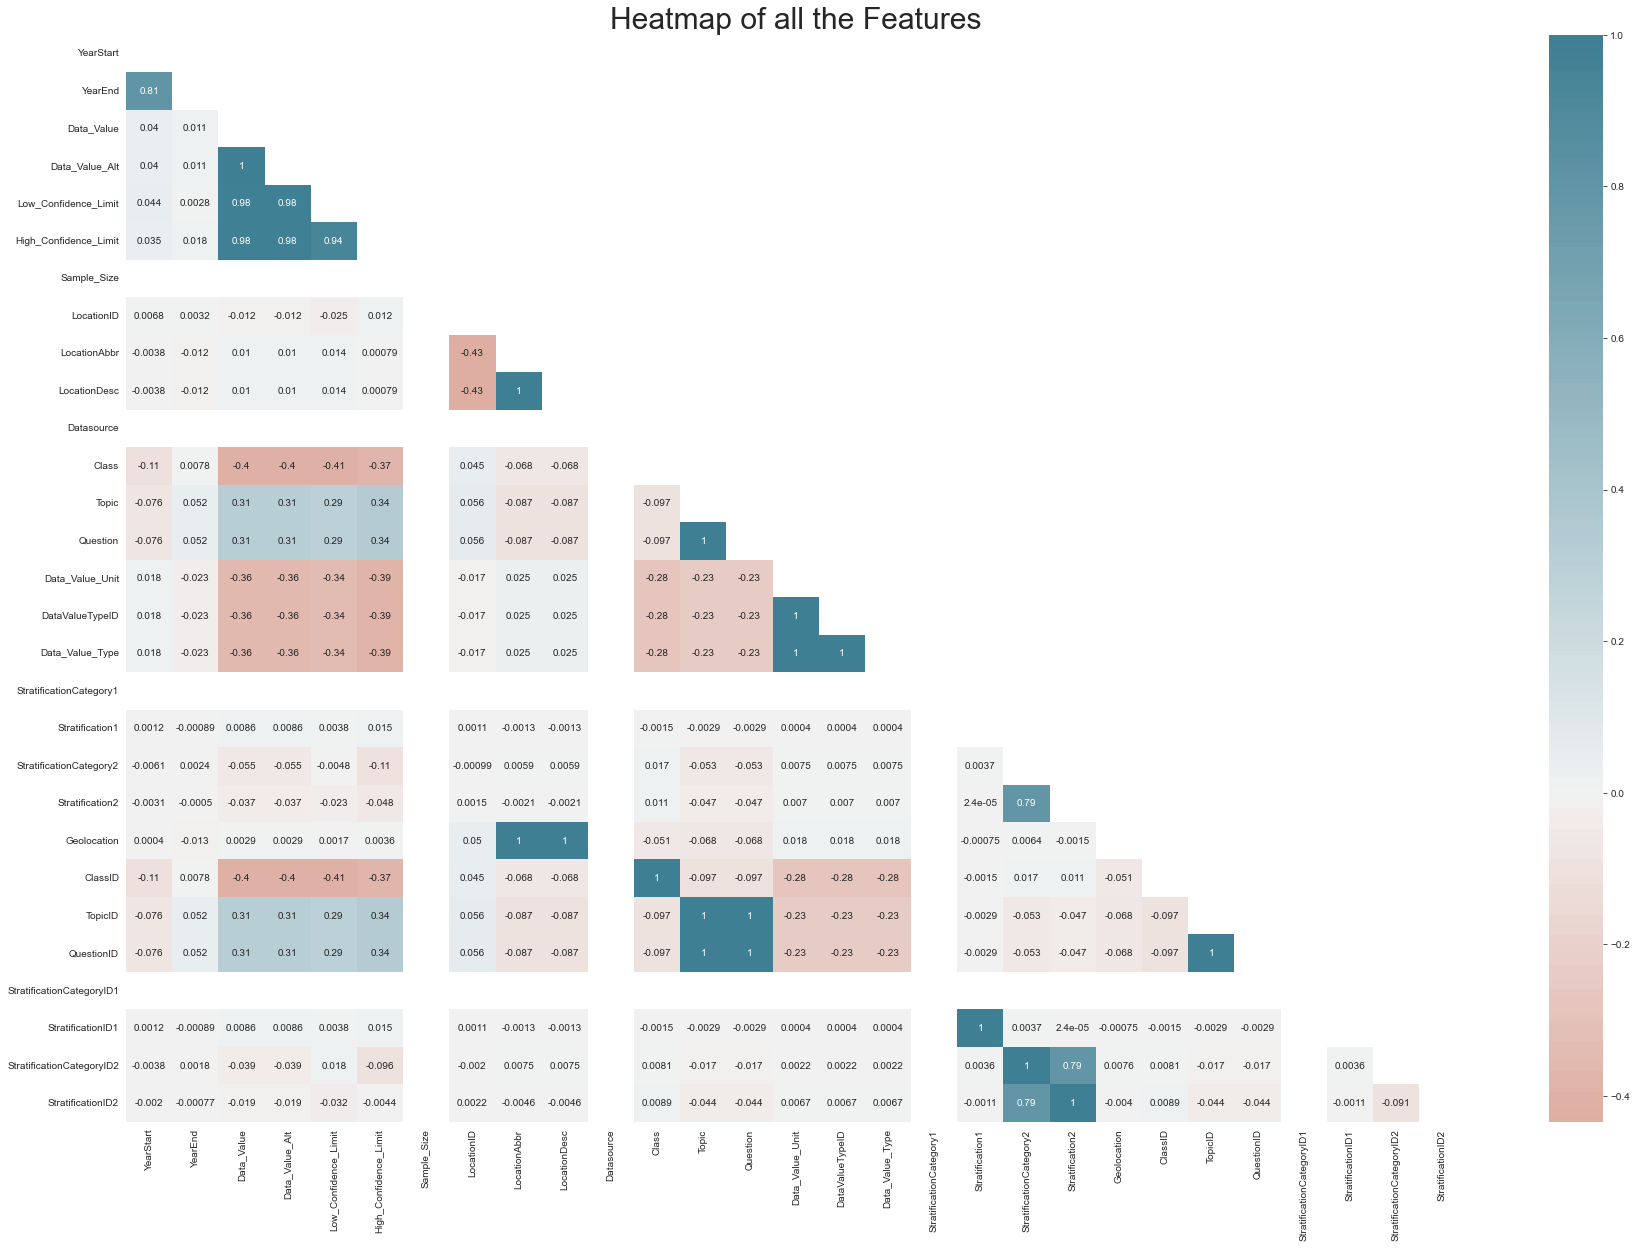

In [13]:
import seaborn as sns


def corr_heatmap(numerical_dataframe: pd.DataFrame, nominal_dataframe: pd.DataFrame):
    new_dataframe = pd.DataFrame()
    for column in numerical_dataframe:
        new_dataframe[column] = numerical_dataframe[column]

    for column in nominal_dataframe:
        mapping = nominal_dataframe[column].value_counts().to_dict()
        for i, (key, _) in enumerate(mapping.items()):
            mapping[key] = i
        new_dataframe[column] = nominal_dataframe[column].map(mapping)

    # 设置绘图风格
    sns.set_style("whitegrid")
    # 设置画板尺寸
    plt.subplots(figsize=(30, 20))

    # 画热力图
    # 为上三角矩阵生成掩码
    mask = np.zeros_like(new_dataframe.corr(), dtype=bool)
    mask[np.triu_indices_from(mask)] = True

    sns.heatmap(
        new_dataframe.corr(),
        cmap=sns.diverging_palette(20, 220, n=200),
        mask=mask,  # 数据显示在mask为False的单元格中
        annot=True,  # 注入数据
        center=0,  # 绘制有色数据时将色彩映射居中的值
    )
    plt.title("Heatmap of all the Features", fontsize=30)


corr_heatmap(alzheimer_numerical, alzheimer_nominal)
# corr_heatmap(github_numerical, github_nominal)

### 2.4 通过数据对象之间的相似性来填补缺失值
* 计算所有数据对象两两之间的相似度矩阵，选取相似度最高的数据项对缺失数据进行填充

In [ ]:
from sklearn.impute import KNNImputer


imputer = KNNImputer(n_neighbors=2)

alzheimer_sim_filled = imputer.fit_transform(alzheimer_data_numerized)
print(alzheimer_sim_filled)